In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%env folder = X:\5_Research\Paul\dsi_origins\

env: folder=X:\5_Research\Paul\dsi_origins\


In [2]:
#define path
path = %env folder

### Load data

In [ ]:
df_iucn = pd.read_csv(path+R'raw_data/2024-12-11_IUCN_global_assessment_all_categories_simple_summary.csv', index_col = 0)
df_wildsi_and_ncbi = pd.read_csv(path+R'processed_data/2024-08-28_df_wildsi_with_ncbi_lineage.csv', index_col = 0)

### Select WiLDSI species for analysis - categories assessed by IUCN

In [ ]:
df_wildsi_and_ncbi_only_species = df_wildsi_and_ncbi[df_wildsi_and_ncbi['Rank'] == 'SPECIES']

In [ ]:
df_wildsi_and_ncbi_only_species_with_iucn_categories = df_wildsi_and_ncbi_only_species[(df_wildsi_and_ncbi_only_species['CODE'] == 'PLN') | (df_wildsi_and_ncbi_only_species['Kingdom name'].isin(['Metazoa', 'Fungi']))]

### Select IUCN species

In [ ]:
category_mapping = {  
    'Critically Endangered': 'Threatened',  
    'Endangered': 'Threatened',  
    'Vulnerable': 'Threatened',  
    'Near Threatened': 'Lower Risk',  
    'Least Concern': 'Lower Risk',  
    'Data Deficient': 'Lower Risk',
    'Lower Risk/least concern': 'Lower Risk',
    'Lower Risk/near threatened': 'Lower Risk',
    'Lower Risk/conservation dependent': 'Lower Risk',
    'Extinct': 'Extinct',  
    'Extinct in the Wild': 'Extinct',
    'Data Deficient': 'Data Deficient',
    'Not assessed': 'Not assessed'
}  

In [ ]:
df_iucn_selected = df_iucn[['internalTaxonId', 'scientificName', 'populationTrend', 'redlistCategory']]

In [ ]:
df_iucn_selected.columns = ['internalTaxonId', 'Species name', 'populationTrend', 'redlistCategory']

In [ ]:
df_ncbi_lineage_with_iucn = pd.merge(df_wildsi_and_ncbi_only_species_with_iucn_categories, df_iucn_selected, on='Species name', how='left')

In [ ]:
df_ncbi_lineage_with_iucn['redlistCategory'].fillna('Not assessed', inplace=True)

In [ ]:
df_ncbi_lineage_with_iucn_assessed = df_ncbi_lineage_with_iucn
df_ncbi_lineage_with_iucn_assessed = df_ncbi_lineage_with_iucn[df_ncbi_lineage_with_iucn['redlistCategory'] != 'Not assessed']

In [ ]:
df_ncbi_lineage_with_iucn_assessed['Aggregated_Category'] = df_ncbi_lineage_with_iucn_assessed['redlistCategory'].map(category_mapping)

In [ ]:
df_ncbi_lineage_with_iucn_assessed['Phylum name'].value_counts()

In [28]:
df_ncbi_lineage_with_iucn['redlistCategory'].value_counts()

redlistCategory
Not assessed                         644197
Least Concern                         37878
Vulnerable                             4398
Endangered                             4379
Data Deficient                         2988
Near Threatened                        2959
Critically Endangered                  1990
Lower Risk/near threatened              127
Extinct                                  75
Lower Risk/least concern                 46
Extinct in the Wild                      34
Lower Risk/conservation dependent        22
Name: count, dtype: int64

In [20]:
df_ncbi_lineage_with_iucn.to_csv(path+R'processed_data/lineage_iucn.csv')

In [30]:
df_ncbi_lineage_with_iucn.head()

,Taxid,CODE,ORGANISM,Rank,Group name,Superkingdom name,Kingdom name,Phylum name,Class name,Order name,Family name,Genus name,Species name,internalTaxonId,populationTrend,redlistCategory
0,2132616,INV,Delia sp. BIOUG21783-D06,SPECIES,flies,Eukaryota,Metazoa,Arthropoda,Insecta,Diptera,Anthomyiidae,Delia,Delia sp. BIOUG21783-D06,NaN,NaN,Not assessed
1,1472648,PLN,Aquilaria agallochum,SPECIES,eudicots,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Malvales,Thymelaeaceae,Aquilaria,Aquilaria agallochum,NaN,NaN,Not assessed
2,36312,VRT,Hynobius retardatus,SPECIES,salamanders,Eukaryota,Metazoa,Chordata,Amphibia,Caudata,Hynobiidae,Hynobius,Hynobius retardatus,59101.0,Decreasing,Least Concern
3,184236,VRT,Crocodylus mindorensis,SPECIES,crocodiles,Eukaryota,Metazoa,Chordata,NaN,Crocodylia,Crocodylidae,Crocodylus,Crocodylus mindorensis,5672.0,Decreasing,Critically Endangered
4,63121,INV,Ptychodera flava,SPECIES,hemichordates,Eukaryota,Metazoa,Hemichordata,Enteropneusta,NaN,Ptychoderidae,Ptychodera,Ptychodera flava,NaN,NaN,Not assessed


### link iucn back into wildsi data and regression dataset


In [32]:
df_wildsi_idselect = pd.read_csv(path + R'processed_data\wildsi_country_idselect.csv', index_col = 0, keep_default_na=False, na_values=[''], dtype={'id_select': 'str', 'PRIMARY_DOI':'str', 'PRIMARY_PMCID':'str'})

In [33]:
df = df_wildsi_idselect.drop(columns = ['COUNTRY', 'ISO_ori']).drop_duplicates().reset_index(drop = True)

In [34]:
df_taxid_iucn = df_ncbi_lineage_with_iucn[['Taxid','redlistCategory']].drop_duplicates()
taxid_iucn_dict = dict(zip(list(df_taxid_iucn['Taxid']),list(df_taxid_iucn['redlistCategory']))) 
df['iucn_cat'] = df['TAXID'].map(taxid_iucn_dict)

In [35]:
df['iucn_cat'] = df['iucn_cat'].fillna('No IUCN category')

In [36]:
df.to_csv(path + R'processed_data\wildsi_country_idselect_iucn.csv')

In [13]:
#df = pd.read_csv(path + R'processed_data\wildsi_country_idselect_iucn.csv', index_col = 0)

C:\Users\a494-nipw010\AppData\Local\Temp\ipykernel_344\1263867861.py:1: DtypeWarning: Columns (3,4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + R'processed_data\wildsi_country_idselect_iucn.csv', index_col = 0)


In [65]:
#open the regression dataset to consider the labels therein
df_extract_com_type_time = pd.read_csv(path+R'processed_data\extractivism_com3_type_time.csv', index_col = 0, dtype={'id_select': 'str'})

In [69]:
df['iucn_cat'].unique()

array(['Not assessed', 'No IUCN category', 'Least Concern',
       'Critically Endangered', 'Near Threatened', 'Endangered',
       'Data Deficient', 'Vulnerable',
       'Lower Risk/conservation dependent', 'Extinct',
       'Lower Risk/near threatened', 'Lower Risk/least concern',
       'Extinct in the Wild'], dtype=object)

In [71]:
iucn_dict = {'Not assessed':0, 'No IUCN category':0, 'Least Concern':0,
       'Critically Endangered':1, 'Near Threatened':0, 'Endangered':1,
       'Data Deficient':0, 'Vulnerable':1,
       'Lower Risk/conservation dependent':0, 'Extinct':0,
       'Lower Risk/near threatened':0, 'Lower Risk/least concern':0,
       'Extinct in the Wild':0}

In [73]:
df['iucn_cat_binary'] = df['iucn_cat'].map(iucn_dict)

In [74]:
len(df[df['iucn_cat_binary'] == 1])

938325

In [ ]:
# Initialize a dictionary to store entailment columns
entailment_columns = ['iucn_cat_binary']  # Add other categories as needed, 'marine', 'crops' , 'Viruses',
entails = {col: [] for col in entailment_columns}

# Group the df_ids DataFrame by 'id_select' to perform calculations in bulk
grouped_df = df.groupby('id_select')
selected_ids = list(set(df['id_select']))

# For each identifier, calculate entailments for all categories at once
nr = 1
for identifier in df_extract_com_type_time['id_select']:
    if identifier in selected_ids:
        # Select the group for the current identifier
        df_id_select = grouped_df.get_group(identifier)

        # Check each category and store entailment as 1 if any rows contain a positive value
        for category in entailment_columns:
            entails[category].append(int((df_id_select[category] > 0).any()))
    else: 
        for category in entailment_columns:
            entails[category].append(np.NaN)
    
    if nr in range(0,100000,100):
        print(nr)
    nr = nr+1
    
# Convert dictionary to DataFrame if needed
entails_df = pd.DataFrame(entails)


In [ ]:
df_extract_com_type_time_iucn = df_extract_com_type_time.copy()
df_extract_com_type_time_iucn = df_extract_com_type_time_iucn.join(entails_df)

In [97]:
len(df_extract_com_type_time_iucn[df_extract_com_type_time_iucn['iucn_cat_binary'].isna()])

0

In [99]:
len(df_extract_com_type_time_iucn)

94598

In [101]:
len(df_extract_com_type_time_iucn[df_extract_com_type_time_iucn['iucn_cat_binary'] == 1])/len(df_extract_com_type_time_iucn)

0.031396012600689235

In [39]:
df_extract_com_type_time_iucn_new.to_csv(path+R'processed_data\extractivism_com3_type_time_iucn.csv')

In [41]:
df_extract_com_type_time_iucn_new

,id_select,extractivism_g77_oecd_1,extractivism_g77_brics_1,extractivism_oecd_brics_1,extractivism_oecd_g77_1,extractivism_brics_g77_1,extractivism_brics_oecd_1,extractivism_g77_oecd_2,extractivism_g77_brics_2,extractivism_oecd_brics_2,...,Viruses,marine,pathogens,crops,year_published,after_nagoya,megadiv,megadiv_g77,megadiv_brics,iucn_cat_binary
0,10.1002/jpln.201100382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,2012,0.0,0,0,0,0
1,10.1002/jsfa.8281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,2017,1.0,0,0,0,0
2,10.1002/mrd.22210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,2013,0.0,0,0,0,0
3,10.1006/bojl.2001.0485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,2001,0.0,0,0,0,0
4,10.1007/s001220050005,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,2000,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94593,pmc93007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,2001,0.0,0,0,0,0
94594,pmc93245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,2001,0.0,0,0,0,0
94595,pmc93301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,2001,0.0,0,0,0,0
94596,pmc96788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,1999,0.0,0,0,0,0


In [45]:
df_extract_com_type_time_iucn_new[(df_extract_com_type_time_iucn_new['extractivism_brics_oecd_2'] == 1) & (df_extract_com_type_time_iucn_new['extractivism_g77_oecd_2'] == 1)] 

,id_select,extractivism_g77_oecd_1,extractivism_g77_brics_1,extractivism_oecd_brics_1,extractivism_oecd_g77_1,extractivism_brics_g77_1,extractivism_brics_oecd_1,extractivism_g77_oecd_2,extractivism_g77_brics_2,extractivism_oecd_brics_2,...,Viruses,marine,pathogens,crops,year_published,after_nagoya,megadiv,megadiv_g77,megadiv_brics,iucn_cat_binary
52,10.1007/s00606-007-0529-y,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,...,0,0,0,0,2007,0.0,1,1,0,0
53,10.1007/s00606-007-0549-7,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,...,0,0,0,0,2007,0.0,1,1,0,0
55,10.1007/s00606-007-0596-0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,...,0,0,0,0,2007,0.0,1,1,1,0
60,10.1007/s00606-007-0634-y,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,...,0,0,0,0,2008,0.0,1,0,1,0
61,10.1007/s00606-008-0005-3,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,...,0,0,0,0,2008,0.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93992,pmc6477865,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,...,0,1,0,0,2019,1.0,1,1,1,0
94069,pmc6502714,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,...,0,1,1,0,2018,1.0,1,0,1,0
94090,pmc6506246,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,...,1,0,1,0,2019,1.0,1,1,1,0
94302,pmc6558771,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,...,0,0,1,0,2019,1.0,1,0,1,0


### Bulk distribution of IUCN assessed species in WiLDSI

C:\Users\a494-nipw010\AppData\Local\Temp\ipykernel_13508\1248516575.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


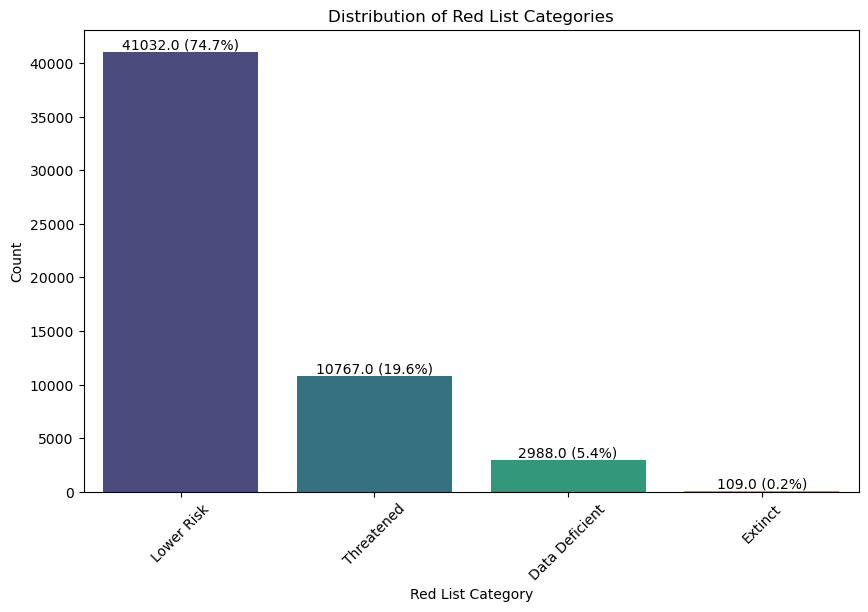

In [52]:
# Count the occurrences of each category  
category_counts = df_ncbi_lineage_with_iucn_assessed['Aggregated_Category'].value_counts()  

# Calculate percentages  
total_counts = category_counts.sum()  
percentages = (category_counts / total_counts) * 100  

# Create a bar plot  
plt.figure(figsize=(10, 6))  
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')  
plt.title('Distribution of Red List Categories')  
plt.xlabel('Red List Category')  
plt.ylabel('Count')  
plt.xticks(rotation=45)  

# Display percentages on the bars  
for p in ax.patches:  
    ax.annotate(f'{p.get_height()} ({percentages[category_counts.index[int(p.get_x() + p.get_width() / 2)]]:.1f}%)',   
                (p.get_x() + p.get_width() / 2., p.get_height()),   
                ha='center', va='bottom', fontsize=10)  

plt.show()  

### Selecting terrestrial species

In [54]:
terrestrial_phyla = ['Chordata', 'Arthropoda', 'Onychophora']
Chordata_ter_groups = [
    'birds',  
    'frogs & toads',  
    'lizards & snakes',  
    'snakes',  
    'rodents',  
    'bats',  
    'salamanders',  
    'primates',  
    'insectivores',  
    'marsupials',   
    'carnivores',  
    'hawks & eagles',  
    'placentals',   
    'rabbits & hares',  
    'caecilians',  
    'crocodiles',  
    'odd-toed ungulates',  
    'vertebrates',
    'monotremes',  
] 

Arthropoda_ter_groups = [  
    'damselflies',  
    'dragonflies & damselflies',  
    'butterflies',  
    'beetles',  
    'bees',  
    'crickets',  
    'flies',  
    'spiders',  
    'grasshoppers',  
    'moths',  
    'ants',  
    'millipedes',  
    'walking sticks',  
    'mantids',  
    'bugs',   
    'mites & ticks',  
    'insects',  
    'termites',  
    'roaches',  
    'stoneflies',  
    'psyllids',  
    'mayflies',  
    'caddisflies',  
    'springtails'  
]

Onychophora_ter_groups = ['velvet worms']


In [56]:
phylum_groups_terr = {  
    'Arthropoda': Arthropoda_ter_groups,
    'Chordata': Chordata_ter_groups,
    'Onychophora': Onychophora_ter_groups, 
}  

# Filter the DataFrame based on phylum and group names  
terrestrial_DSI = df_ncbi_lineage_with_iucn_assessed[  
    df_ncbi_lineage_with_iucn_assessed['Phylum name'].isin(terrestrial_phyla) &   
    df_ncbi_lineage_with_iucn_assessed['Group name'].isin(  
        [group for groups in phylum_groups_terr.values() for group in groups]  
    )  
]  

In [58]:
#all_terrestrial_species = pd.concat([terrestrial_DSI, df_ncbi_lineage_with_iucn_assessed_plants, df_ncbi_lineage_with_iucn_assessed_fungi])

### Terrestrial DSI

C:\Users\a494-nipw010\AppData\Local\Temp\ipykernel_13508\2212488829.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


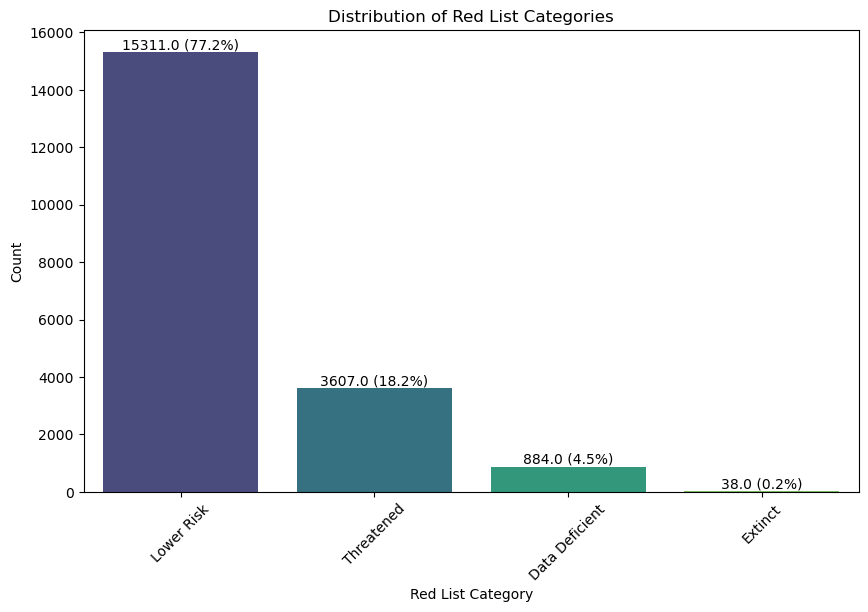

In [61]:
# Count the occurrences of each category  
category_counts = terrestrial_DSI['Aggregated_Category'].value_counts()  

# Calculate percentages  
total_counts = category_counts.sum()  
percentages = (category_counts / total_counts) * 100  

# Create a bar plot  
plt.figure(figsize=(10, 6))  
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')  
plt.title('Distribution of Red List Categories')  
plt.xlabel('Red List Category')  
plt.ylabel('Count')  
plt.xticks(rotation=45)  

# Display percentages on the bars  
for p in ax.patches:  
    ax.annotate(f'{p.get_height()} ({percentages[category_counts.index[int(p.get_x() + p.get_width() / 2)]]:.1f}%)',   
                (p.get_x() + p.get_width() / 2., p.get_height()),   
                ha='center', va='bottom', fontsize=10)  

plt.show()  

In [63]:
terrestrial_DSI['Group name'].value_counts()

Group name
birds                        4920
frogs & toads                3836
lizards & snakes             2858
snakes                       1394
rodents                      1306
damselflies                   956
bats                          751
dragonflies & damselflies     588
butterflies                   494
salamanders                   467
primates                      273
insectivores                  250
marsupials                    233
beetles                       213
carnivores                    202
hawks & eagles                174
bees                          146
flies                         112
placentals                    108
crickets                       92
grasshoppers                   85
spiders                        80
moths                          62
rabbits & hares                62
caecilians                     55
ants                           38
millipedes                     13
crocodiles                     13
odd-toed ungulates             12
wal

C:\Users\a494-nipw010\AppData\Local\Temp\ipykernel_13508\3063421121.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = (threatened_value / total_species[i]) * 100


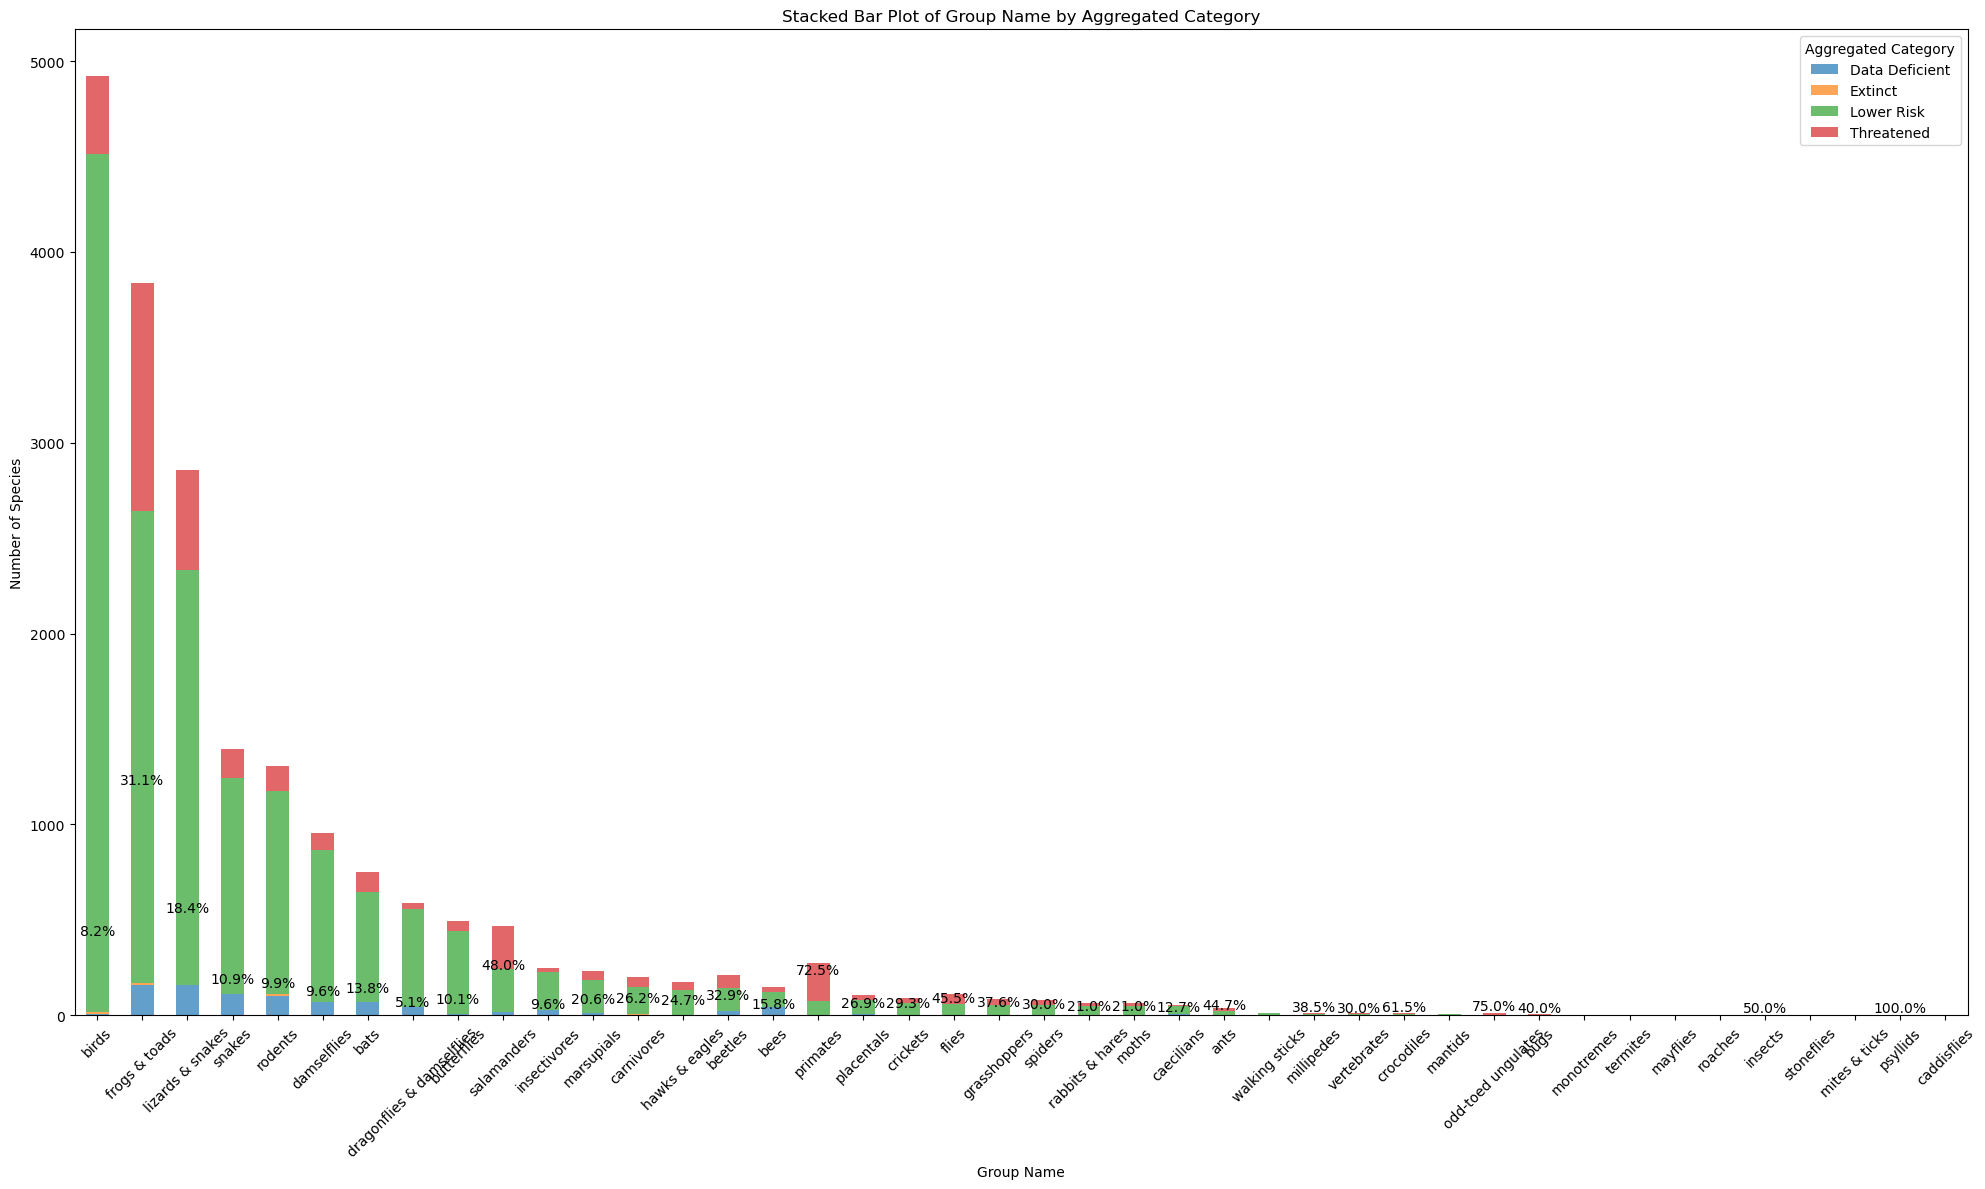

In [65]:
# Count occurrences of each Aggregated_Category within each Group name  
grouped_data = terrestrial_DSI.groupby(['Group name', 'Aggregated_Category']).size().unstack(fill_value=0).sort_values(by='Lower Risk', ascending=False)  

# Step 2: Calculate the total number of species for each group  
total_species = grouped_data.sum(axis=1)  

# Step 3: Create the stacked bar plot  
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(20, 12), alpha=0.7)  

# Step 4: Overlay the percentages for the "Threatened" category  
if 'Threatened' in grouped_data.columns:  
    for i in range(len(grouped_data)):  
        threatened_value = grouped_data.iloc[i]['Threatened']  
        if threatened_value > 0:  # Only display percentage if there is a value  
            percentage = (threatened_value / total_species[i]) * 100  
            ax.text(i, threatened_value + 1, f'{percentage:.1f}%', ha='center', va='bottom')  

# Step 5: Customize the plot  
plt.title('Stacked Bar Plot of Group Name by Aggregated Category')  
plt.xlabel('Group Name')  
plt.ylabel('Number of Species')  
plt.legend(title='Aggregated Category')  
plt.xticks(rotation=45)  
plt.tight_layout()  # Adjust layout to make room for the labels  

# Step 6: Show the plot  
plt.show()  

In [66]:
terrestrial_DSI['Aggregated_Category_Species'] = 'Other terrestrial species'

C:\Users\a494-nipw010\AppData\Local\Temp\ipykernel_13508\3251434838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terrestrial_DSI['Aggregated_Category_Species'] = 'Other terrestrial species'


### Selecting marine species

In [70]:
marine_phyla = ['Arthropoda', 'Mollusca', 'Cnidaria', 'Annelida', 'Echinodermata', 'Chordata']
Arthropoda_groups = ['crustaceans', 'amphipods', 'isopods', 'horseshoe crabs']
Mollusca_groups = ['gastropods', 'bivalves', 'cephalopods']
Cnidaria_groups = ['stony corals', 'hydrozoans', 'blue corals', 'soft corals', 'sea pens', 'sea anemones', 'mat anemones']
Annelida_groups = ['segmented worms']
Echinodermata_groups = ['sea cucumbers', 'starfish', 'sea urchins']
Chordata_groups = ['bony fishes', 'sharks & rays', 'turtles', 'whales & dolphins', 'chimaeras', 'lampreys', 'hagfishes', 'even-toed ungulates & whales', 'coelacanths', 'lungfishes']

#df_ncbi_lineage_with_iucn_assessed_arthropoda['Group name'].value_counts()

In [72]:
phylum_groups = {  
    'Arthropoda': Arthropoda_groups,  
    'Mollusca': Mollusca_groups,  
    'Cnidaria': Cnidaria_groups,  
    'Annelida': Annelida_groups,  
    'Echinodermata': Echinodermata_groups,  
    'Chordata': Chordata_groups  
}  

# Filter the DataFrame based on phylum and group names  
marine_DSI = df_ncbi_lineage_with_iucn_assessed[  
    df_ncbi_lineage_with_iucn_assessed['Phylum name'].isin(marine_phyla) &   
    df_ncbi_lineage_with_iucn_assessed['Group name'].isin(  
        [group for groups in phylum_groups.values() for group in groups]  
    )  
]  

### Marine DSI

C:\Users\a494-nipw010\AppData\Local\Temp\ipykernel_13508\4261299915.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


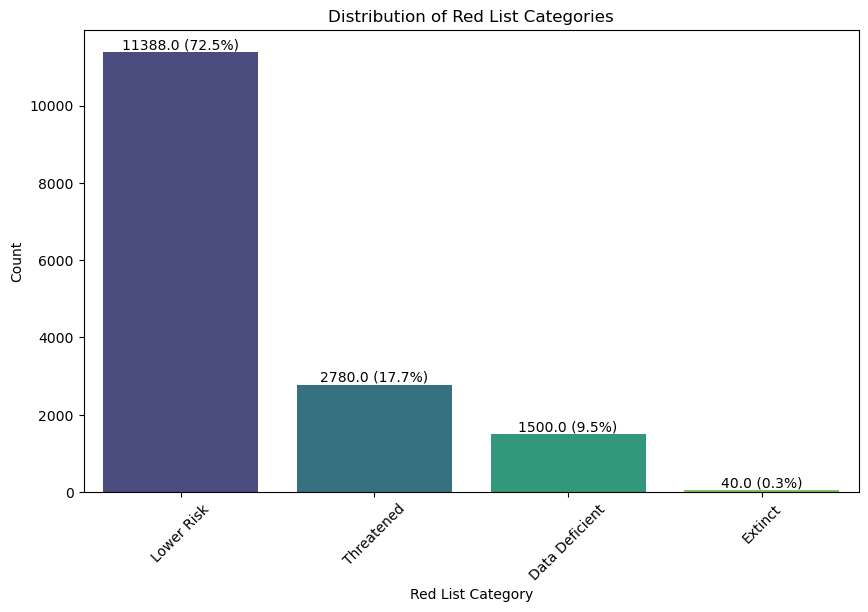

In [75]:
# Count the occurrences of each category  
category_counts = marine_DSI['Aggregated_Category'].value_counts()  

# Calculate percentages  
total_counts = category_counts.sum()  
percentages = (category_counts / total_counts) * 100  

# Create a bar plot  
plt.figure(figsize=(10, 6))  
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')  
plt.title('Distribution of Red List Categories')  
plt.xlabel('Red List Category')  
plt.ylabel('Count')  
plt.xticks(rotation=45)  

# Display percentages on the bars  
for p in ax.patches:  
    ax.annotate(f'{p.get_height()} ({percentages[category_counts.index[int(p.get_x() + p.get_width() / 2)]]:.1f}%)',   
                (p.get_x() + p.get_width() / 2., p.get_height()),   
                ha='center', va='bottom', fontsize=10)  

plt.show()  

In [77]:
marine_DSI['Group name'].value_counts()

Group name
bony fishes                     11202
gastropods                       1398
crustaceans                       803
sharks & rays                     680
stony corals                      352
bivalves                          290
cephalopods                       263
turtles                           201
even-toed ungulates & whales      162
whales & dolphins                  82
sea cucumbers                      78
segmented worms                    51
chimaeras                          33
lampreys                           31
hagfishes                          22
amphipods                          19
hydrozoans                          9
sea pens                            5
isopods                             5
blue corals                         4
horseshoe crabs                     4
lungfishes                          4
soft corals                         4
coelacanths                         2
starfish                            1
sea anemones                        1
s

C:\Users\a494-nipw010\AppData\Local\Temp\ipykernel_13508\1056027509.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = (threatened_value / total_species[i]) * 100


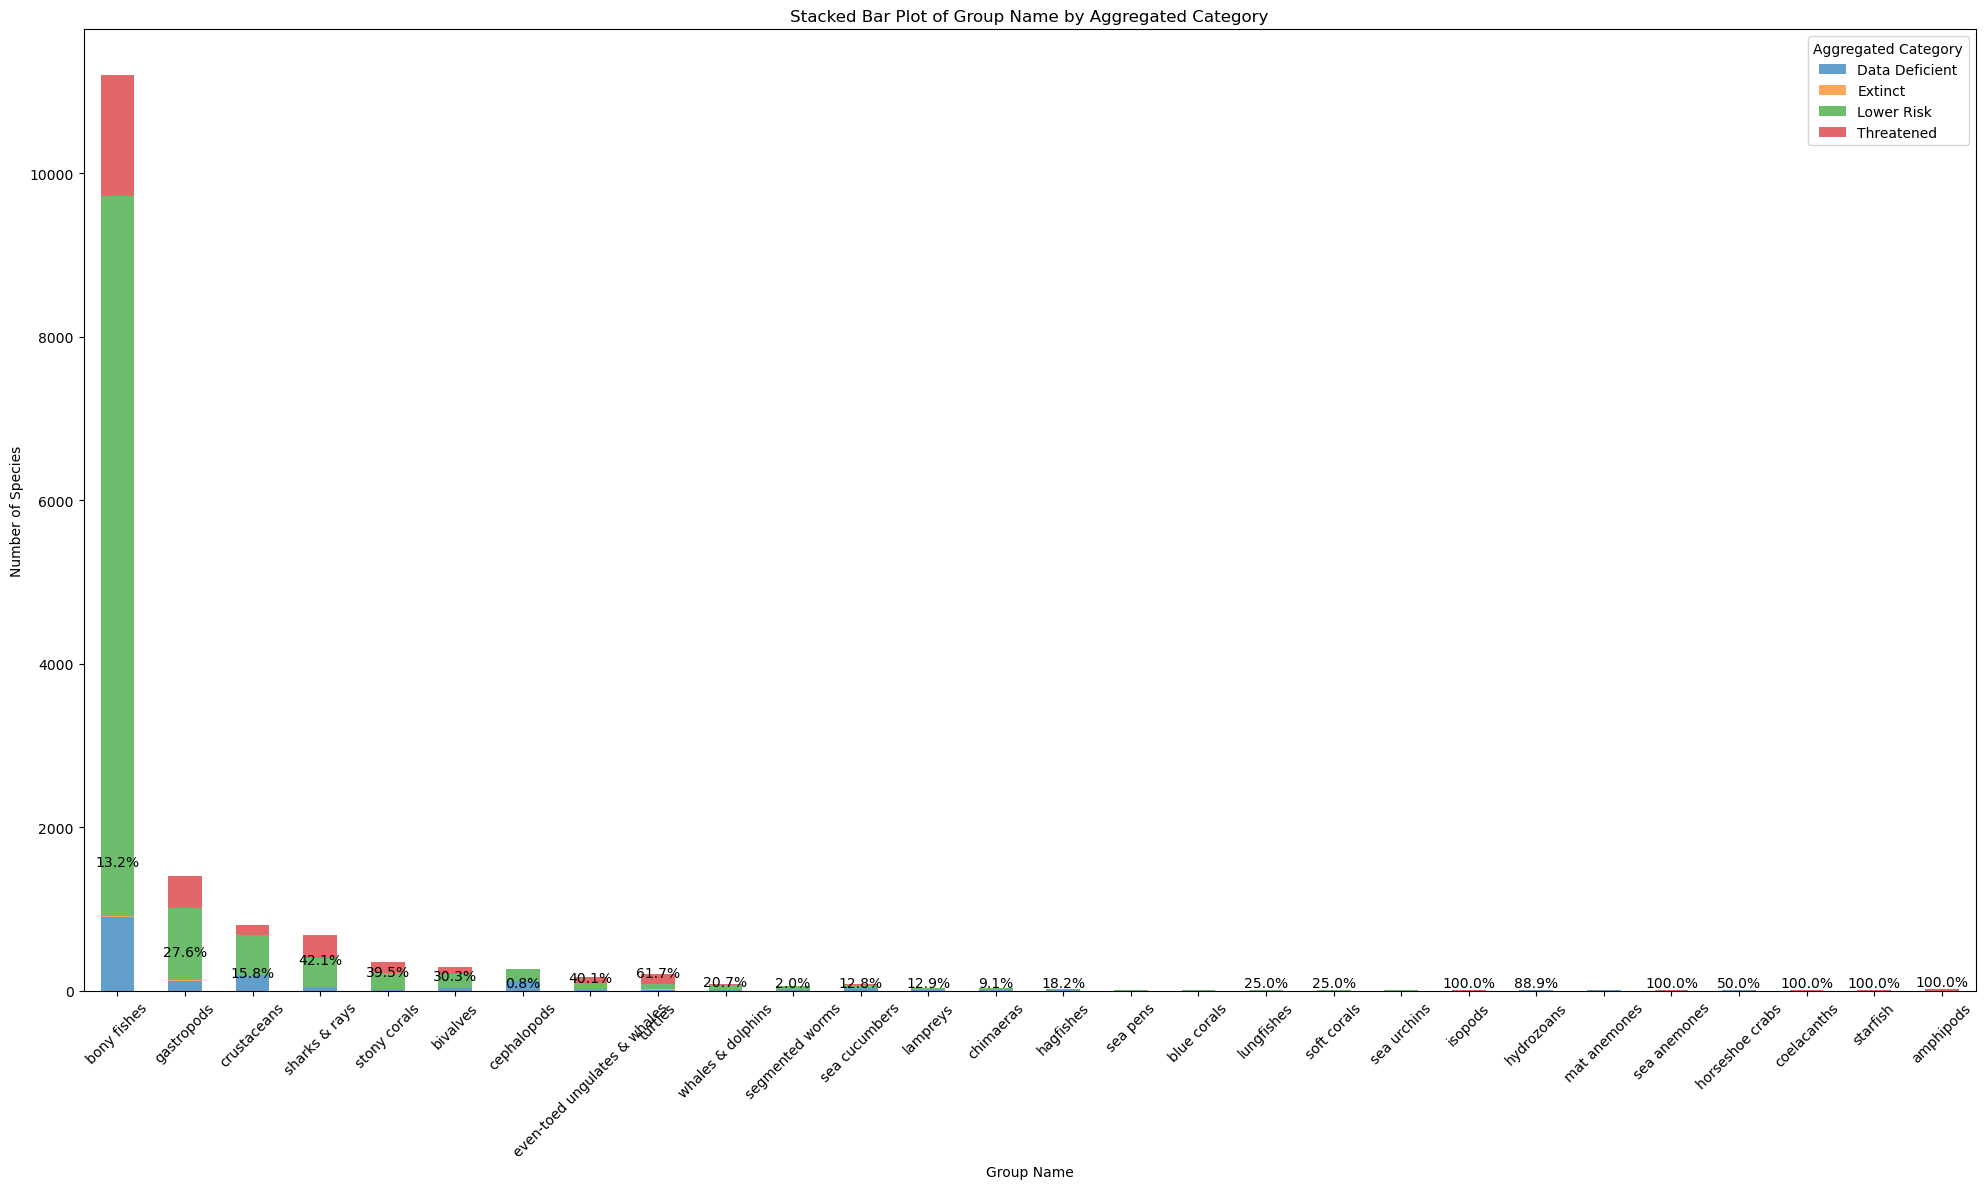

In [79]:
# Count occurrences of each Aggregated_Category within each Group name  
grouped_data = marine_DSI.groupby(['Group name', 'Aggregated_Category']).size().unstack(fill_value=0).sort_values(by='Lower Risk', ascending=False)  

# Step 2: Calculate the total number of species for each group  
total_species = grouped_data.sum(axis=1)  

# Step 3: Create the stacked bar plot  
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(20, 12), alpha=0.7)  

# Step 4: Overlay the percentages for the "Threatened" category  
if 'Threatened' in grouped_data.columns:  
    for i in range(len(grouped_data)):  
        threatened_value = grouped_data.iloc[i]['Threatened']  
        if threatened_value > 0:  # Only display percentage if there is a value  
            percentage = (threatened_value / total_species[i]) * 100  
            ax.text(i, threatened_value + 1, f'{percentage:.1f}%', ha='center', va='bottom')  

# Step 5: Customize the plot  
plt.title('Stacked Bar Plot of Group Name by Aggregated Category')  
plt.xlabel('Group Name')  
plt.ylabel('Number of Species')  
plt.legend(title='Aggregated Category')  
plt.xticks(rotation=45)  
plt.tight_layout()  # Adjust layout to make room for the labels  

# Step 6: Show the plot  
plt.show()  

In [80]:
marine_DSI['Aggregated_Category_Species'] = 'Marine species'

C:\Users\a494-nipw010\AppData\Local\Temp\ipykernel_13508\2948560862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marine_DSI['Aggregated_Category_Species'] = 'Marine species'


### Plants DSI

In [84]:
plants_DSI = df_ncbi_lineage_with_iucn_assessed[df_ncbi_lineage_with_iucn_assessed['CODE'] == 'PLN']

C:\Users\a494-nipw010\AppData\Local\Temp\ipykernel_13508\2769310768.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


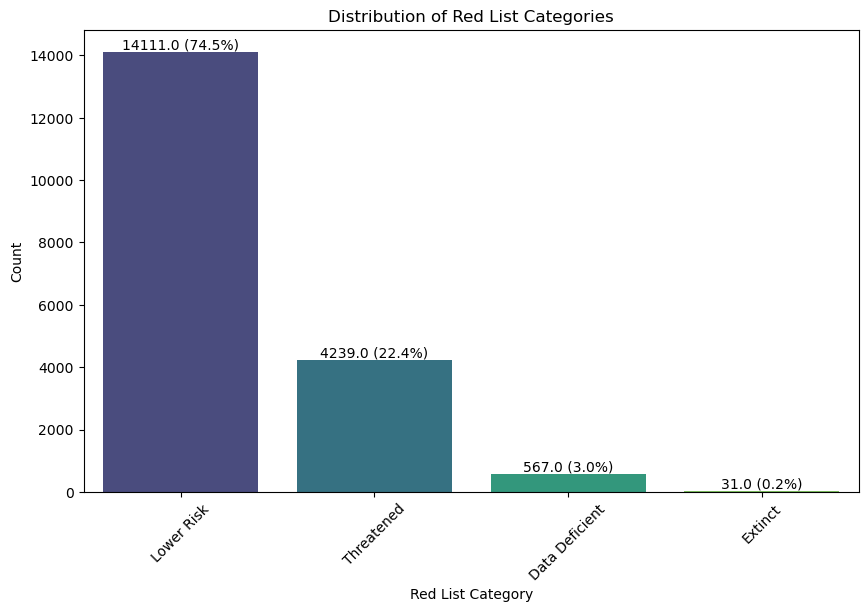

In [86]:
# Count the occurrences of each category  
category_counts = plants_DSI['Aggregated_Category'].value_counts()  

# Calculate percentages  
total_counts = category_counts.sum()  
percentages = (category_counts / total_counts) * 100  

# Create a bar plot  
plt.figure(figsize=(10, 6))  
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')  
plt.title('Distribution of Red List Categories')  
plt.xlabel('Red List Category')  
plt.ylabel('Count')  
plt.xticks(rotation=45)  

# Display percentages on the bars  
for p in ax.patches:  
    ax.annotate(f'{p.get_height()} ({percentages[category_counts.index[int(p.get_x() + p.get_width() / 2)]]:.1f}%)',   
                (p.get_x() + p.get_width() / 2., p.get_height()),   
                ha='center', va='bottom', fontsize=10)  

plt.show()  

In [88]:
plants_DSI['Group name'].value_counts()

Group name
eudicots            13372
monocots             2643
flowering plants     1908
seed plants           633
ferns                 228
mosses                 72
liverworts             40
club-mosses            26
horsetails              8
green plants            7
red algae               7
brown algae             2
hornworts               2
Name: count, dtype: int64

C:\Users\a494-nipw010\AppData\Local\Temp\ipykernel_13508\3346315395.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = (threatened_value / total_species[i]) * 100


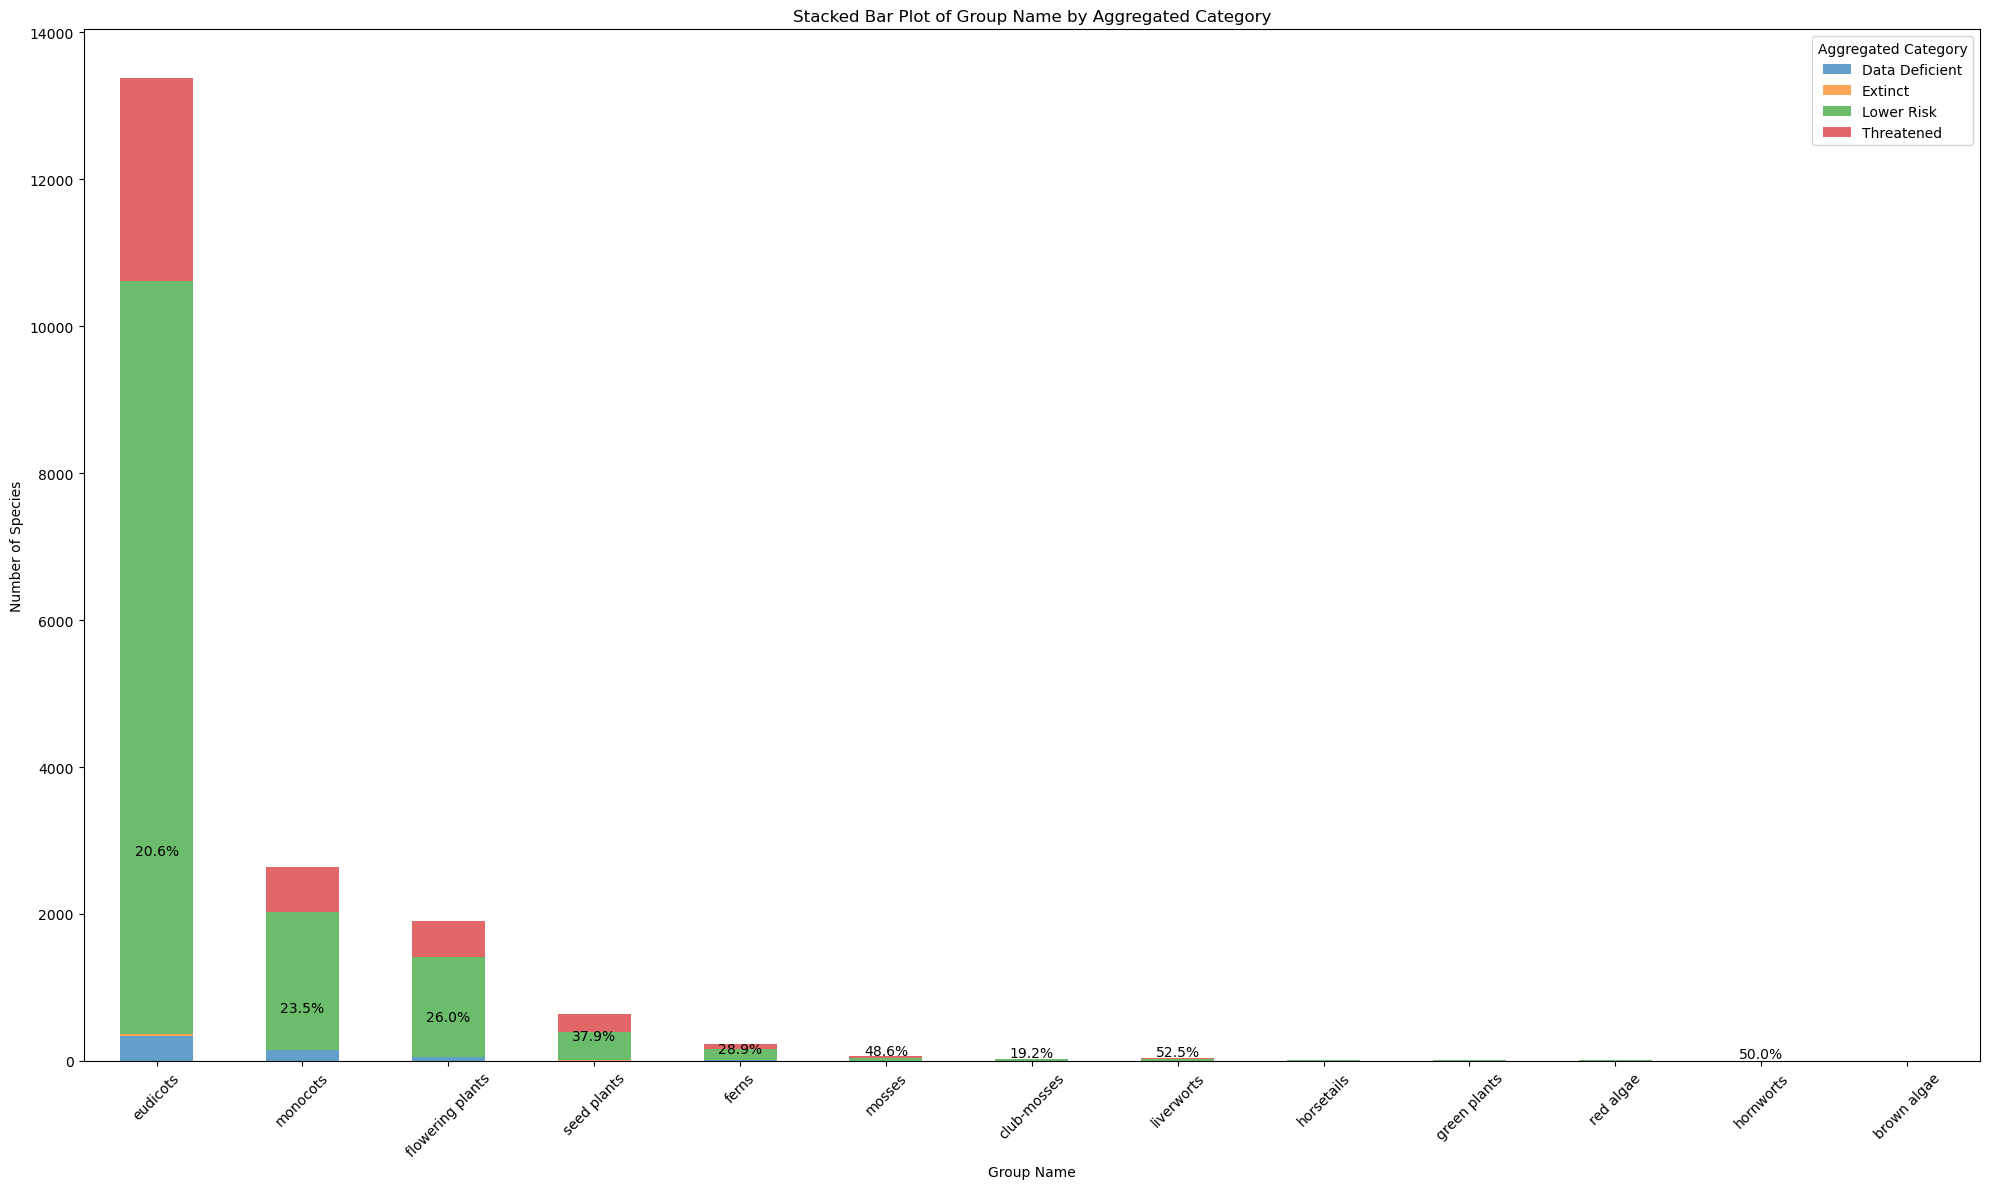

In [90]:
# Count occurrences of each Aggregated_Category within each Group name  
grouped_data = plants_DSI.groupby(['Group name', 'Aggregated_Category']).size().unstack(fill_value=0).sort_values(by='Lower Risk', ascending=False)  

# Step 2: Calculate the total number of species for each group  
total_species = grouped_data.sum(axis=1)  

# Step 3: Create the stacked bar plot  
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(20, 12), alpha=0.7)  

# Step 4: Overlay the percentages for the "Threatened" category  
if 'Threatened' in grouped_data.columns:  
    for i in range(len(grouped_data)):  
        threatened_value = grouped_data.iloc[i]['Threatened']  
        if threatened_value > 0:  # Only display percentage if there is a value  
            percentage = (threatened_value / total_species[i]) * 100  
            ax.text(i, threatened_value + 1, f'{percentage:.1f}%', ha='center', va='bottom')  

# Step 5: Customize the plot  
plt.title('Stacked Bar Plot of Group Name by Aggregated Category')  
plt.xlabel('Group Name')  
plt.ylabel('Number of Species')  
plt.legend(title='Aggregated Category')  
plt.xticks(rotation=45)  
plt.tight_layout()  # Adjust layout to make room for the labels  

# Step 6: Show the plot  
plt.show()  

### Fungi DSI

In [197]:
fungi_DSI = df_ncbi_lineage_with_iucn_assessed[df_ncbi_lineage_with_iucn_assessed['Kingdom name'] == 'Fungi']

<ipython-input-198-a0251f1a4be4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


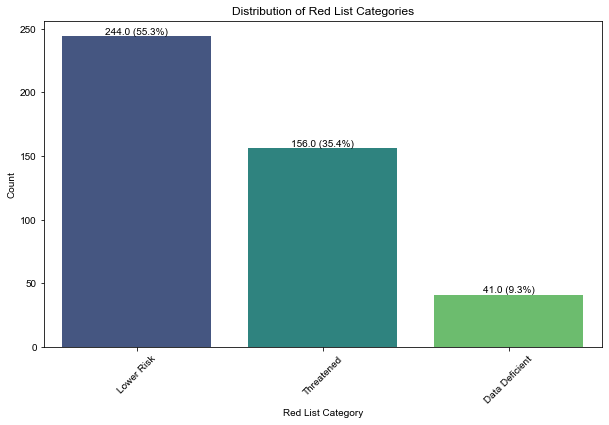

In [198]:
# Count the occurrences of each category  
category_counts = fungi_DSI['Aggregated_Category'].value_counts()  

# Calculate percentages  
total_counts = category_counts.sum()  
percentages = (category_counts / total_counts) * 100  

# Create a bar plot  
plt.figure(figsize=(10, 6))  
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')  
plt.title('Distribution of Red List Categories')  
plt.xlabel('Red List Category')  
plt.ylabel('Count')  
plt.xticks(rotation=45)  

# Display percentages on the bars  
for p in ax.patches:  
    ax.annotate(f'{p.get_height()} ({percentages[category_counts.index[int(p.get_x() + p.get_width() / 2)]]:.1f}%)',   
                (p.get_x() + p.get_width() / 2., p.get_height()),   
                ha='center', va='bottom', fontsize=10)  

plt.show()  

In [199]:
fungi_DSI['Group name'].value_counts()

Group name
basidiomycete fungi    352
ascomycete fungi        89
Name: count, dtype: int64

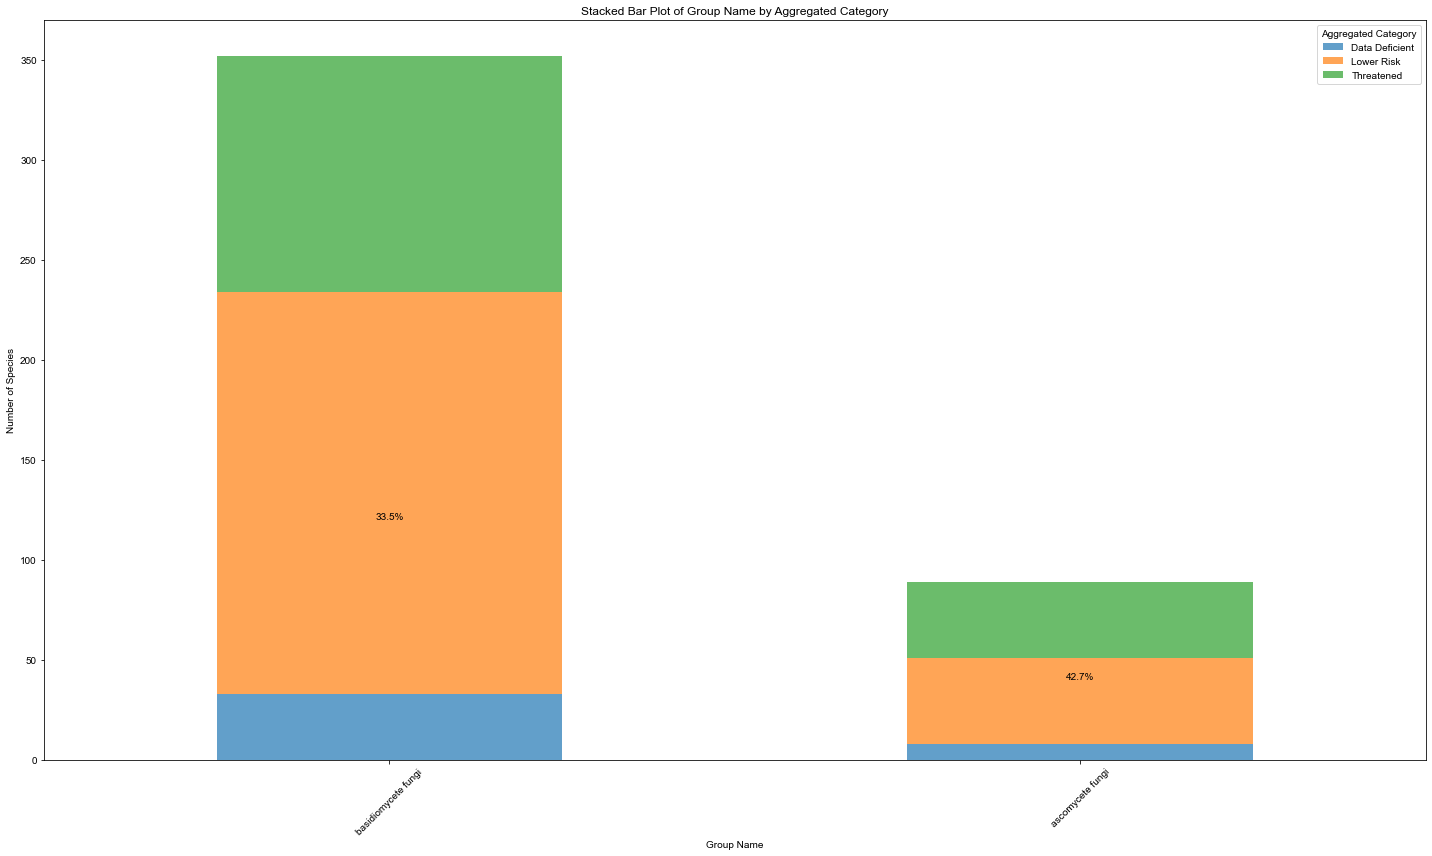

In [200]:
# Count occurrences of each Aggregated_Category within each Group name  
grouped_data = fungi_DSI.groupby(['Group name', 'Aggregated_Category']).size().unstack(fill_value=0).sort_values(by='Lower Risk', ascending=False)  

# Step 2: Calculate the total number of species for each group  
total_species = grouped_data.sum(axis=1)  

# Step 3: Create the stacked bar plot  
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(20, 12), alpha=0.7)  

# Step 4: Overlay the percentages for the "Threatened" category  
if 'Threatened' in grouped_data.columns:  
    for i in range(len(grouped_data)):  
        threatened_value = grouped_data.iloc[i]['Threatened']  
        if threatened_value > 0:  # Only display percentage if there is a value  
            percentage = (threatened_value / total_species[i]) * 100  
            ax.text(i, threatened_value + 1, f'{percentage:.1f}%', ha='center', va='bottom')  

# Step 5: Customize the plot  
plt.title('Stacked Bar Plot of Group Name by Aggregated Category')  
plt.xlabel('Group Name')  
plt.ylabel('Number of Species')  
plt.legend(title='Aggregated Category')  
plt.xticks(rotation=45)  
plt.tight_layout()  # Adjust layout to make room for the labels  

# Step 6: Show the plot  
plt.show()  

### Fungi+Plants DSI

<ipython-input-201-8ff13d3c173e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


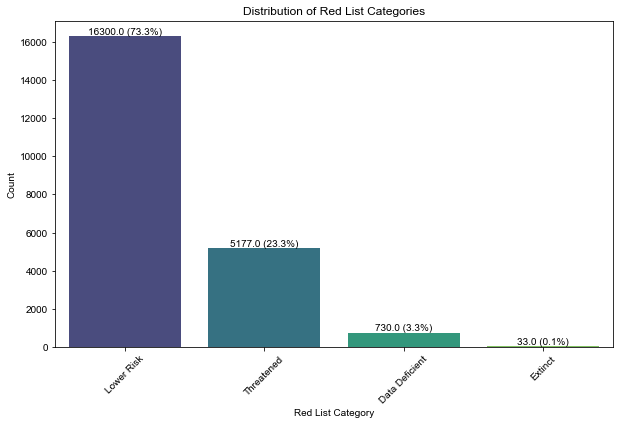

In [201]:
fungi_and_plants_DSI = pd.concat([plants_DSI, fungi_DSI])
# Count the occurrences of each category  
category_counts = fungi_and_plants_DSI['Aggregated_Category'].value_counts()  

# Calculate percentages  
total_counts = category_counts.sum()  
percentages = (category_counts / total_counts) * 100  

# Create a bar plot  
plt.figure(figsize=(10, 6))  
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')  
plt.title('Distribution of Red List Categories')  
plt.xlabel('Red List Category')  
plt.ylabel('Count')  
plt.xticks(rotation=45)  

# Display percentages on the bars  
for p in ax.patches:  
    ax.annotate(f'{p.get_height()} ({percentages[category_counts.index[int(p.get_x() + p.get_width() / 2)]]:.1f}%)',   
                (p.get_x() + p.get_width() / 2., p.get_height()),   
                ha='center', va='bottom', fontsize=10)  

plt.show()  

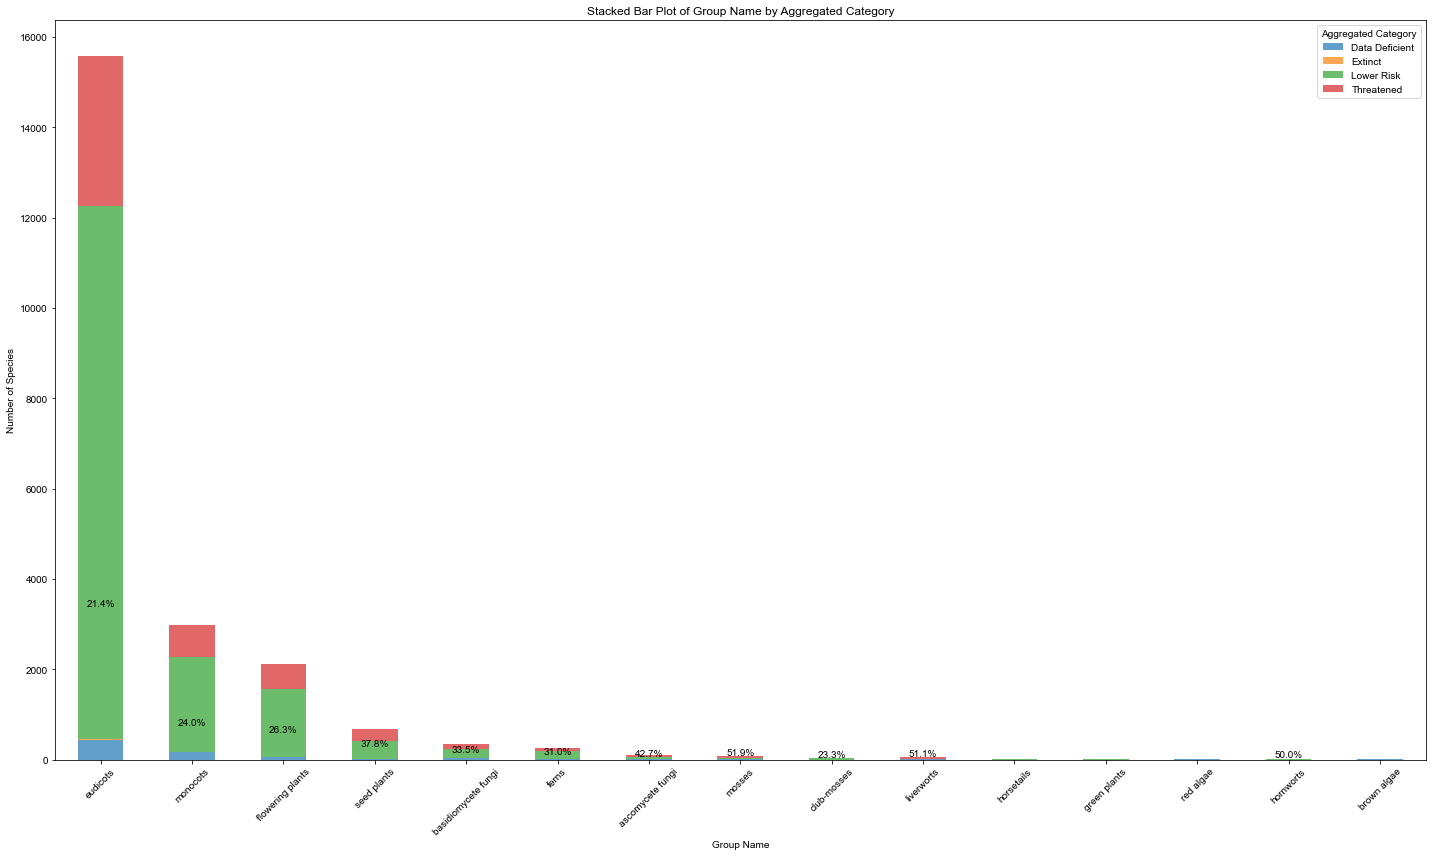

In [202]:
# Count occurrences of each Aggregated_Category within each Group name  
grouped_data = fungi_and_plants_DSI.groupby(['Group name', 'Aggregated_Category']).size().unstack(fill_value=0).sort_values(by='Lower Risk', ascending=False)  

# Step 2: Calculate the total number of species for each group  
total_species = grouped_data.sum(axis=1)  

# Step 3: Create the stacked bar plot  
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(20, 12), alpha=0.7)  

# Step 4: Overlay the percentages for the "Threatened" category  
if 'Threatened' in grouped_data.columns:  
    for i in range(len(grouped_data)):  
        threatened_value = grouped_data.iloc[i]['Threatened']  
        if threatened_value > 0:  # Only display percentage if there is a value  
            percentage = (threatened_value / total_species[i]) * 100  
            ax.text(i, threatened_value + 1, f'{percentage:.1f}%', ha='center', va='bottom')  

# Step 5: Customize the plot  
plt.title('Stacked Bar Plot of Group Name by Aggregated Category')  
plt.xlabel('Group Name')  
plt.ylabel('Number of Species')  
plt.legend(title='Aggregated Category')  
plt.xticks(rotation=45)  
plt.tight_layout()  # Adjust layout to make room for the labels  

# Step 6: Show the plot  
plt.show()  

In [203]:
fungi_and_plants_DSI['Aggregated_Category_Species'] = 'Plants and Fungi'

### All together

In [204]:
all_species = pd.concat([fungi_and_plants_DSI, marine_DSI, terrestrial_DSI])

In [ ]:
all_species

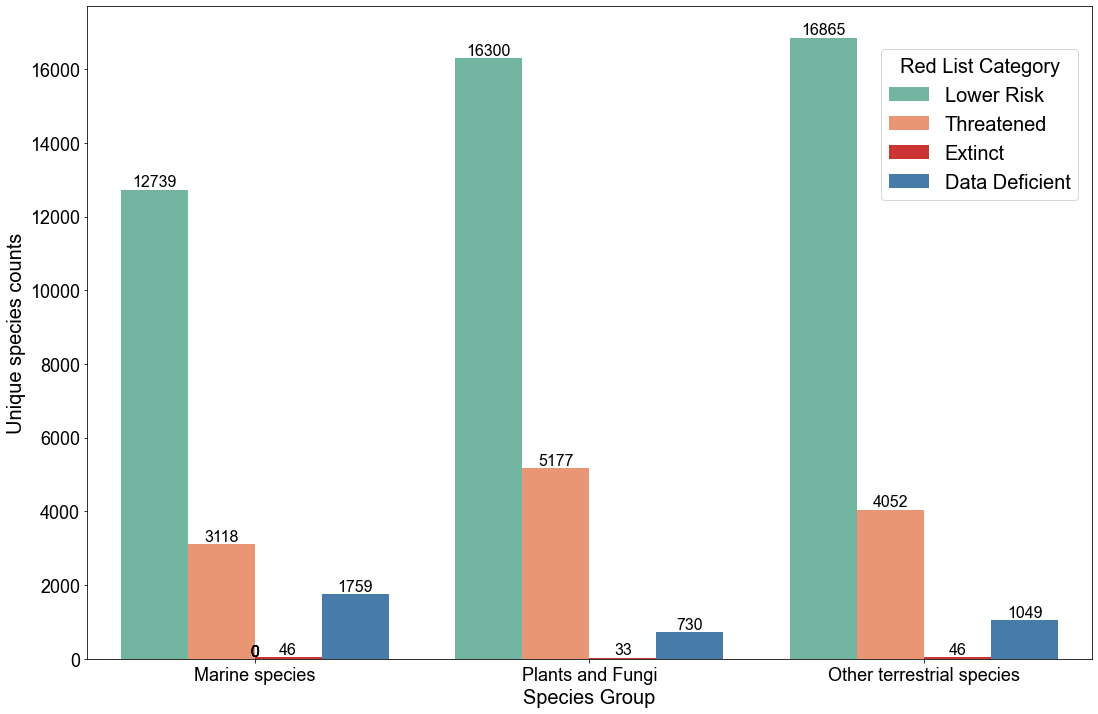

In [212]:
category_counts = all_species.groupby(['Aggregated_Category_Species', 'Aggregated_Category']).size().reset_index(name='Count')  

# Calculate percentages within each species group  
total_counts = category_counts.groupby('Aggregated_Category_Species')['Count'].transform('sum')  
# category_counts['Percentage'] = (category_counts['Count'] / total_counts) * 100  

# Define the order of species groups and the corresponding colors  
species_order = ['Marine species', 'Plants and Fungi', 'Other terrestrial species']  # Define the desired order  
category_order = ['Lower Risk', 'Threatened', 'Extinct', 'Data Deficient']  
colors = ['#66c2a5', '#fc8d62', '#e41a1c', '#377eb8']   

# Set the order of the species groups in the DataFrame  
category_counts['Aggregated_Category_Species'] = pd.Categorical(category_counts['Aggregated_Category_Species'], categories=species_order, ordered=True)  

plt.rcParams["font.family"] = "Arial"   

# Create a grouped bar plot  
plt.figure(figsize=(18, 12))  
ax = sns.barplot(data=category_counts,   
                 x='Aggregated_Category_Species',   
                 y='Count',   
                 hue='Aggregated_Category',   
                 hue_order=category_order,  # Set the order of the hue  
                 palette=colors)  # Set the custom color palette  

# Increase font sizes  
label_fontsize = 20  
tick_fontsize = 18  
annotation_fontsize = 16  
legend_title_fontsize = 20  # Increased font size for legend title  

# Add title and labels  
# plt.title('Red List Categories by Species Group', fontsize=title_fontsize)  
plt.xlabel('Species Group', fontsize=label_fontsize)  
plt.ylabel('Unique species counts', fontsize=label_fontsize)  
plt.xticks(fontsize=tick_fontsize)  
plt.yticks(fontsize=tick_fontsize)  # Increase y-tick font size  

# Display counts on the bars  
for p in ax.patches:  
    height = p.get_height()  
    ax.annotate(f'{height:.0f}',   
                (p.get_x() + p.get_width() / 2., height),   
                ha='center', va='bottom', fontsize=annotation_fontsize)  

# Add legend and adjust layout  
plt.legend(title='Red List Category', bbox_to_anchor=(0.78, 0.95), loc='upper left', fontsize=label_fontsize, title_fontsize=legend_title_fontsize)  
# plt.tight_layout()  

# Save the plot as an SVG file with a white background  
plt.savefig('red_list_categories_by_species_group.svg', format='svg', facecolor='white')  

# Show the plot  
plt.show()  

In [211]:
all_species['Aggregated_Category_Species'].value_counts()

Aggregated_Category_Species
Plants and Fungi             22240
Other terrestrial species    22012
Marine species               17662
Name: count, dtype: int64

### Species used for DSI that have already gone extinct

In [207]:
all_species[(all_species['Aggregated_Category_Species'] == 'Marine species')&(all_species['Aggregated_Category'] == 'Extinct')]

,Unnamed: 0,Taxid,CODE,ORGANISM,Rank,Group name,Superkingdom name,Kingdom name,Phylum name,Class name,Order name,Family name,Genus name,Species name,internalTaxonId,populationTrend,redlistCategory,Aggregated_Category,Aggregated_Category_Species
1911,2773,66189,VRT,Chelonoidis niger,SPECIES,turtles,Eukaryota,Metazoa,Chordata,NaN,Testudines,Testudinidae,Chelonoidis,Chelonoidis niger,9023.0,NaN,Extinct,Extinct,Marine species
29875,41398,348708,VRT,Coregonus oxyrinchus,SPECIES,bony fishes,Eukaryota,Metazoa,Chordata,Actinopteri,Salmoniformes,Salmonidae,Coregonus,Coregonus oxyrinchus,5380.0,NaN,Extinct,Extinct,Marine species
31815,44086,9909,MAM,Bos primigenius,SPECIES,even-toed ungulates & whales,Eukaryota,Metazoa,Chordata,Mammalia,Artiodactyla,Bovidae,Bos,Bos primigenius,136721.0,NaN,Extinct,Extinct,Marine species
39086,54134,1483067,VRT,Luciobarbus nasus,SPECIES,bony fishes,Eukaryota,Metazoa,Chordata,Actinopteri,Cypriniformes,Cyprinidae,Luciobarbus,Luciobarbus nasus,217675561.0,NaN,Extinct,Extinct,Marine species
41923,58242,115942,INV,Achatinella livida,SPECIES,gastropods,Eukaryota,Metazoa,Mollusca,Gastropoda,Stylommatophora,Achatinellidae,Achatinella,Achatinella livida,189.0,NaN,Extinct,Extinct,Marine species
62181,83185,43332,MAM,Elaphurus davidianus,SPECIES,even-toed ungulates & whales,Eukaryota,Metazoa,Chordata,Mammalia,Artiodactyla,Cervidae,Elaphurus,Elaphurus davidianus,7121.0,NaN,Extinct in the Wild,Extinct,Marine species
66496,88187,62061,VRT,Acipenser dabryanus,SPECIES,bony fishes,Eukaryota,Metazoa,Chordata,Actinopteri,Acipenseriformes,Acipenseridae,Acipenser,Acipenser dabryanus,231.0,NaN,Extinct in the Wild,Extinct,Marine species
76887,103069,208353,VRT,Skiffia francesae,SPECIES,bony fishes,Eukaryota,Metazoa,Chordata,Actinopteri,Cyprinodontiformes,Goodeidae,Skiffia,Skiffia francesae,20285.0,NaN,Extinct in the Wild,Extinct,Marine species
77258,103656,106734,VRT,Chelonoidis abingdonii,SPECIES,turtles,Eukaryota,Metazoa,Chordata,NaN,Testudines,Testudinidae,Chelonoidis,Chelonoidis abingdonii,9017.0,NaN,Extinct,Extinct,Marine species
94559,127854,986338,INV,Aylacostoma chloroticum,SPECIES,gastropods,Eukaryota,Metazoa,Mollusca,Gastropoda,NaN,Thiaridae,Aylacostoma,Aylacostoma chloroticum,29612.0,NaN,Extinct in the Wild,Extinct,Marine species


In [208]:
all_species[(all_species['Aggregated_Category_Species'] == 'Plants and Fungi')&(all_species['Aggregated_Category'] == 'Extinct')]

,Unnamed: 0,Taxid,CODE,ORGANISM,Rank,Group name,Superkingdom name,Kingdom name,Phylum name,Class name,Order name,Family name,Genus name,Species name,internalTaxonId,populationTrend,redlistCategory,Aggregated_Category,Aggregated_Category_Species
83209,111683,82448,PLN,Trochetiopsis erythroxylon,SPECIES,eudicots,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Malvales,Malvaceae,Trochetiopsis,Trochetiopsis erythroxylon,30560.0,NaN,Extinct in the Wild,Extinct,Plants and Fungi
84098,113063,904444,PLN,Lachanodes arborea,SPECIES,eudicots,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Asterales,Asteraceae,Lachanodes,Lachanodes arborea,37595.0,NaN,Extinct in the Wild,Extinct,Plants and Fungi
84505,113548,479408,PLN,Camellia amplexicaulis,SPECIES,eudicots,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Ericales,Theaceae,Camellia,Camellia amplexicaulis,191323.0,NaN,Extinct in the Wild,Extinct,Plants and Fungi
90748,121465,41689,PLN,Brugmansia arborea,SPECIES,eudicots,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Solanales,Solanaceae,Brugmansia,Brugmansia arborea,51247708.0,NaN,Extinct in the Wild,Extinct,Plants and Fungi
107080,145031,684373,PLN,Mangifera casturi,SPECIES,eudicots,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Sapindales,Anacardiaceae,Mangifera,Mangifera casturi,32059.0,NaN,Extinct in the Wild,Extinct,Plants and Fungi
141137,192608,382137,PLN,Furcraea macdougallii,SPECIES,monocots,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Asparagales,Asparagaceae,Furcraea,Furcraea macdougallii,136808736.0,NaN,Extinct in the Wild,Extinct,Plants and Fungi
142600,194376,905076,PLN,Brugmansia suaveolens,SPECIES,eudicots,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Solanales,Solanaceae,Brugmansia,Brugmansia suaveolens,51247699.0,NaN,Extinct in the Wild,Extinct,Plants and Fungi
154640,208699,380070,PLN,Geocaryum bornmuelleri,SPECIES,eudicots,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Apiales,Apiaceae,Geocaryum,Geocaryum bornmuelleri,232118222.0,NaN,Extinct,Extinct,Plants and Fungi
211724,280014,55774,PLN,Bromus interruptus,SPECIES,monocots,Eukaryota,Viridiplantae,Streptophyta,Magnoliopsida,Poales,Poaceae,Bromus,Bromus interruptus,165247.0,NaN,Extinct in the Wild,Extinct,Plants and Fungi
211887,280221,251413,PLN,Encephalartos heenanii,SPECIES,seed plants,Eukaryota,Viridiplantae,Streptophyta,Cycadopsida,Cycadales,Zamiaceae,Encephalartos,Encephalartos heenanii,41888.0,NaN,Extinct in the Wild,Extinct,Plants and Fungi


In [209]:
all_species[(all_species['Aggregated_Category_Species'] == 'Terrestrial species')&(all_species['Aggregated_Category'] == 'Extinct')]

,Unnamed: 0,Taxid,CODE,ORGANISM,Rank,Group name,Superkingdom name,Kingdom name,Phylum name,Class name,Order name,Family name,Genus name,Species name,internalTaxonId,populationTrend,redlistCategory,Aggregated_Category,Aggregated_Category_Species


### I